# Codsoft Internship

Task 1 : TITANIC SURVIVAL PREDICTION
Name: TUSHAR KUMAR GUPTA

About
The Titanic disaster remains one of the most notorious maritime tragedies. On April 15, 1912, the RMS Titanic, deemed “unsinkable,” sank on its maiden voyage after hitting an iceberg. The lifeboat shortage led to the loss of 1,502 lives out of 2,224 aboard. Despite the role of chance, certain groups had a higher probability of survival than others.

In this analysis, we will focus on predicting survival rates aboard the Titanic, examining which factors influenced the likelihood of survival.

# Importing libraries and reading csv file

In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("Titanic.csv")

# Data preprocessing 

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
#checking for duplicates
df.duplicated().sum()

0

In [21]:
df["Survived"].value_counts()

Survived
0    548
1    342
Name: count, dtype: int64

In [23]:
df["Pclass"].value_counts()

Pclass
3    490
1    216
2    184
Name: count, dtype: int64

In [24]:
df["Sex"].value_counts()

Sex
male      576
female    314
Name: count, dtype: int64

In [25]:
df["Embarked"].value_counts()

Embarked
S    644
C    169
Q     77
Name: count, dtype: int64

# Checking for null values and handling them 

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#Handling the null values in age column 
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [15]:
#Handling the null values in cabin column 
df['Cabin'] = df['Cabin'].ffill()

In [16]:
#Handling the null values in Embarked column 
df['Embarked'] = df['Embarked'].bfill()

In [17]:
df.dropna(inplace = True)

In [18]:
#Let's check again for null values after handling them
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data Visualization

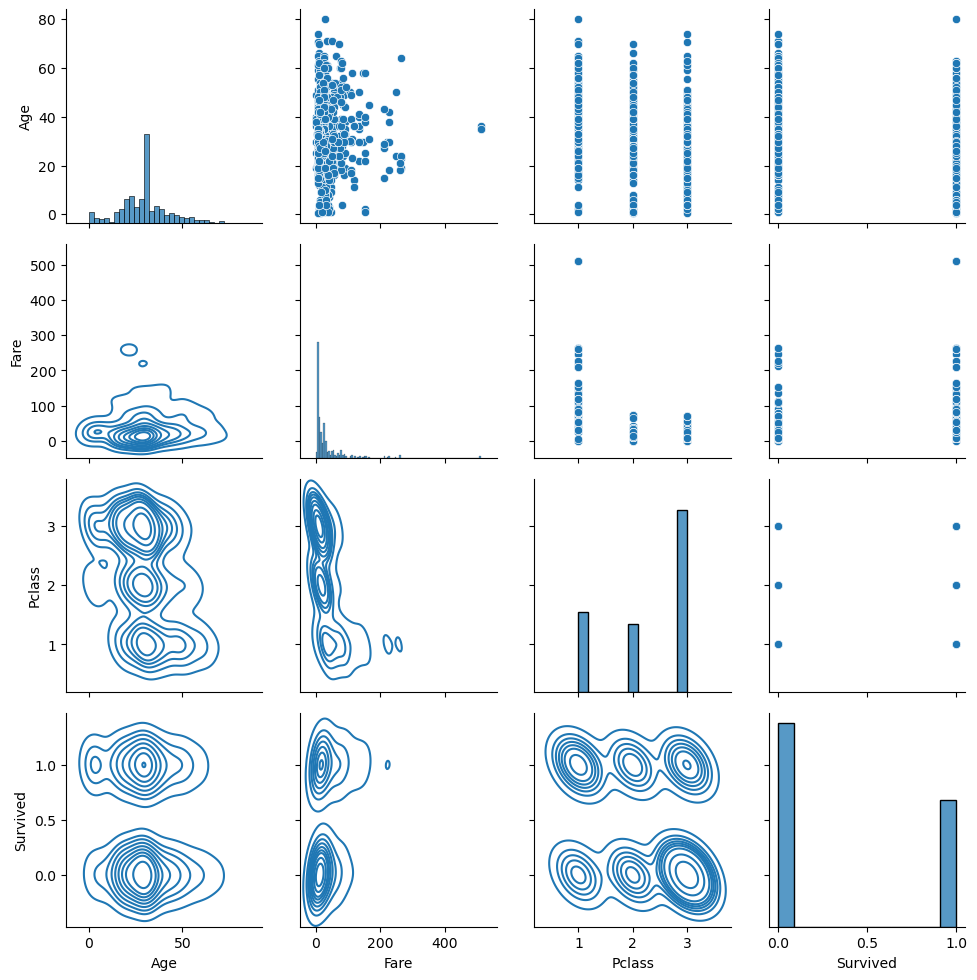

In [19]:
g = sns.PairGrid(df[['Age', 'Fare', 'Pclass', 'Survived']]);
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

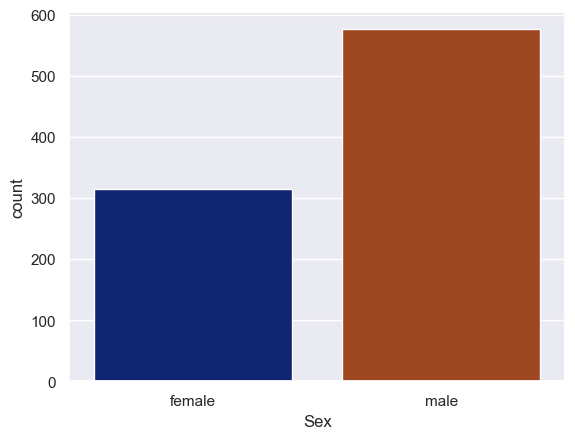

In [47]:
# Plotting Count plot for sex column
sns.set(style="darkgrid")
sns.countplot(x=df['Sex'], palette='dark')
plt.show()

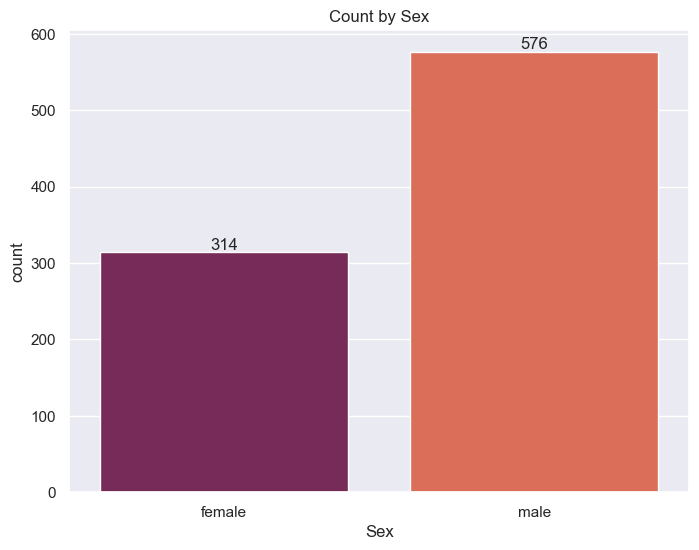

In [48]:
# Plotting Percantage Distribution of Sex Column
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['Sex'], palette='rocket')
ax.set_title('Count by Sex')
ax.bar_label(ax.containers[0])
plt.show()

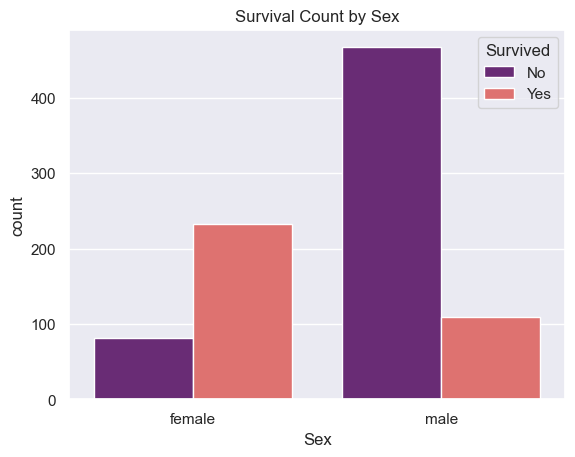

In [52]:
# Showing Distribution of Sex Column Survived Wisesns.set(style="darkgrid")
sns.countplot(x=df['Sex'], hue=df['Survived'], palette='magma')

# Adding title and legend
plt.title('Survival Count by Sex')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

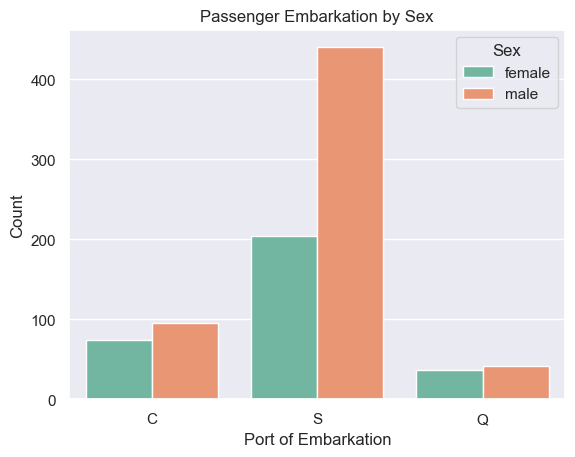

In [55]:
# Showing Distribution of Embarked Sex wise
sns.set(style="darkgrid")
sns.countplot(x=df['Embarked'], hue=df['Sex'], palette='Set2')

# Adding title and labels
plt.title('Passenger Embarkation by Sex')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

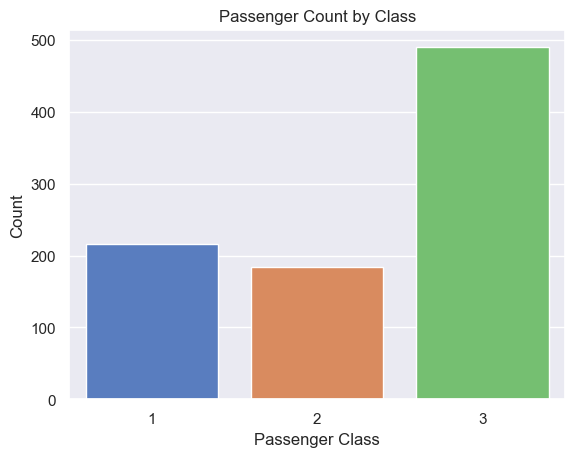

In [56]:
# Plotting CountPlot for Pclass Column
sns.set(style="darkgrid")
sns.countplot(x=df['Pclass'], palette='muted')

# Adding title and labels
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

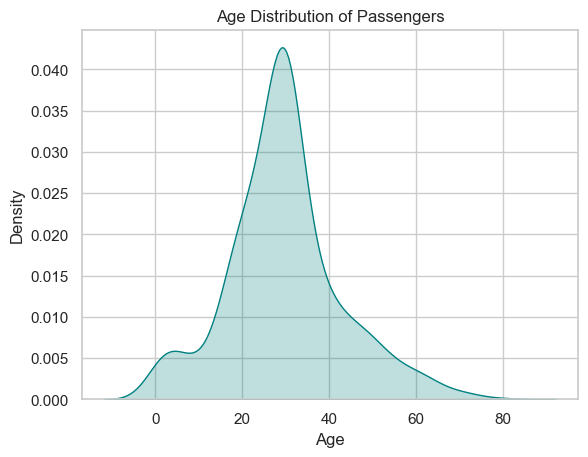

In [57]:
# Age Distribution of Passengers
sns.set(style="whitegrid")
sns.kdeplot(x=df['Age'], fill=True, color='teal', bw_adjust=1.2)

# Adding title and labels
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

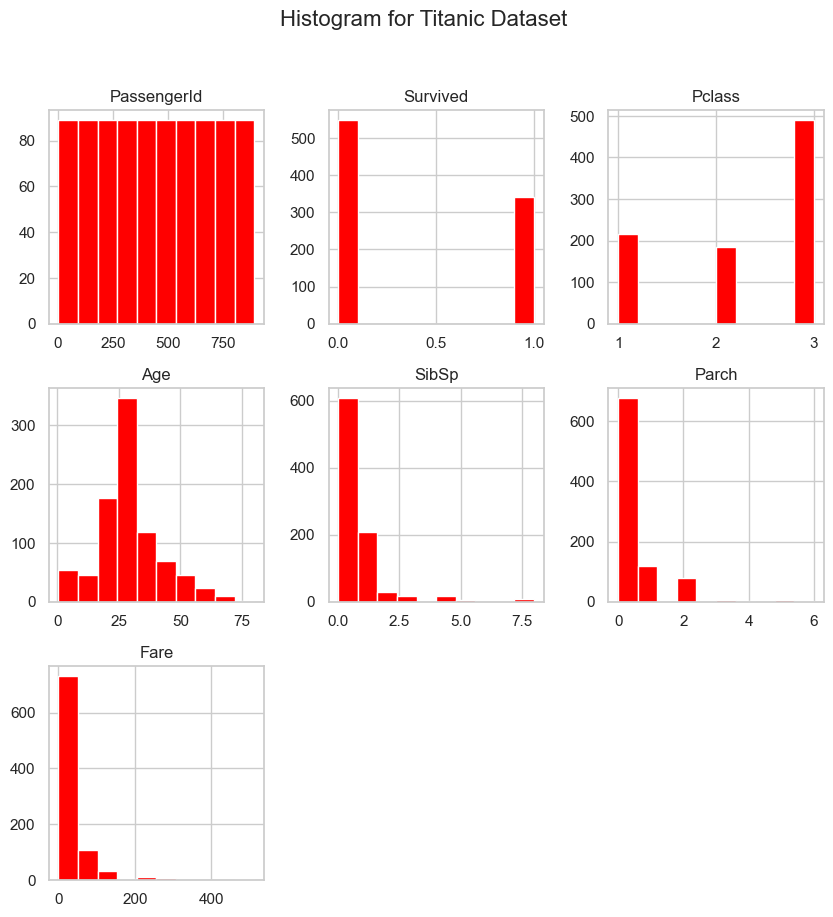

In [60]:
df.hist(figsize=(10, 10), color='red')

# Adding a title
plt.suptitle('Histogram for Titanic Dataset', fontsize=16)

# Display the plot
plt.show()

# Label Encoding and Normalization 

In [62]:
df = pd.get_dummies(df, drop_first=True)

In [64]:
X = df.drop(["Survived"], axis = 1)
y = df.loc[:, "Survived"].values

In [70]:
# Split Data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [71]:
MinMax = MinMaxScaler()
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

# Logistic Regression

In [72]:
# Logistic Regression Classifier
LogReg = LogisticRegression(random_state=42, solver="liblinear")
LogReg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [73]:
# Predict
y_pred = LogReg.predict(X_test)

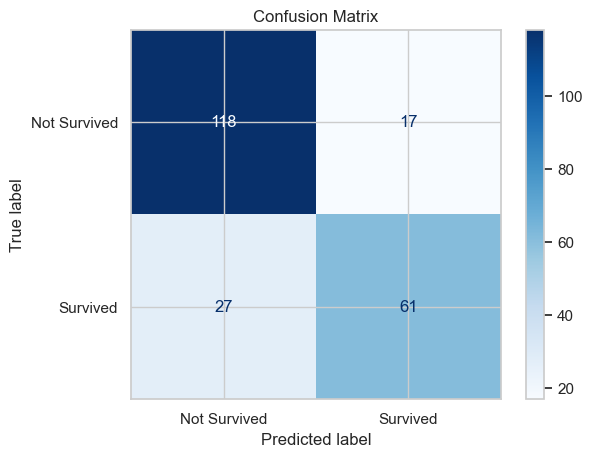

In [77]:
# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=LogReg.classes_)

# Create a ConfusionMatrixDisplay object
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['Not Survived', 'Survived'])

# Plot the confusion matrix
cm_display.plot(cmap='Blues', values_format='d')  # 'd' format for integer values

plt.title('Confusion Matrix')
plt.show()

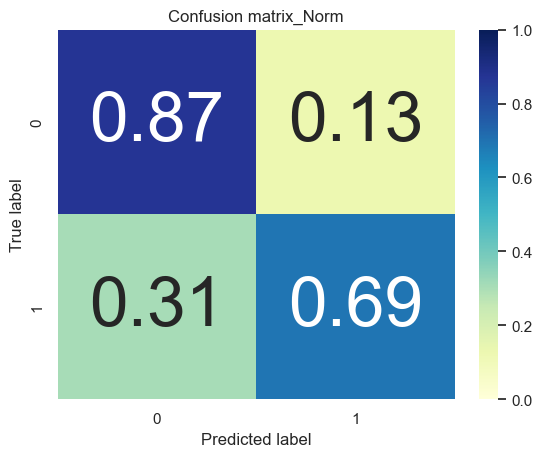

In [86]:

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix_Norm'):
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    confusion_matrix_norm = confusion_matrix / confusion_matrix.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(confusion_matrix_norm, classes = LogReg.classes_, title='Confusion matrix_Norm')

# Done by Tushar Kumar Gupta